# UDACITY STUDENT PROJECT
Goal : To find the differences betweeen students who pass a project versus those who dont.

In [1]:
# Get data
import unicodecsv

enrollments = []
f = open('enrollments.csv', 'rb')
reader = unicodecsv.DictReader(f)

for row in reader:
    enrollments.append(row)
    
f.close()

enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [2]:
# reduce number of lines by using 'WITH' loop and
# make a function to get data

import unicodecsv

def importCsv(file_address):
    with open(file_address,'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
enrollments = importCsv('enrollments.csv')
daily_engagement = importCsv('daily_engagement.csv')
project_submissions = importCsv('project_submissions.csv')

print 'enrollments:' ,'\n', enrollments[0], '\n' 
print 'daily engagement:', '\n',  daily_engagement[0], '\n' 
print 'project submissions:', '\n',  project_submissions[0], '\n' 



enrollments: 
{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'} 

daily engagement: 
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'} 

project submissions: 
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'} 



In [3]:

# Fix Datatypes

# Before running this cell, check if it has run before else you will get an error as the dataypes
# would already have been fixed and the code will not be able to correct the correct datatype

# in csv's all the data is stored in string format
# let's convert data to their needed datatypes so as to not get confused later on

from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# fix enrollments
# need to convert - is_udacity, is_canceled , join_date, cancel_date, days_to_cancel 
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])

print "enrollments[0]:",'\n', enrollments[0],'\n','\n'     # print first row in the csv 

# fix daily_engagement
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
print "daily_engagement[0]:", '\n',daily_engagement[0],'\n','\n'   

# fix project_submissions
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])


print "project_submissions[0]:", '\n', project_submissions[0], '\n','\n'



enrollments[0]: 
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'448', u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65} 


daily_engagement[0]: 
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, u'acct': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)} 


project_submissions[0]: 
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': datetime.datetime(2015, 1, 16, 0, 0), u'creation_date': datetime.datetime(2015, 1, 14, 0, 0)} 




In [4]:
# Investigate the data

In [5]:
# number of rows of data in each file
print 'enrollments:',len(enrollments)
print 'daily_engagement:',len(daily_engagement)
print 'project_submissions:', len(project_submissions), '\n'

# looking at rows of data in each files it looks there is a 
# need to write a function to get number of unique students

enrollments: 1640
daily_engagement: 136240
project_submissions: 3642 



In [6]:
# first we need uniformity across data, enrollments & project submissions have 'account_key' whereas daily_engagement has 'acct'
# so we change 'acct' in daily_engagement 'account_key' 
# WILL THROW ERROR IF RUN MORE THAN ONCE DUE TO CHANGED DATA
for row in daily_engagement:
    row['account_key'] = row['acct']
    del row['acct']

In [7]:
# number of unique students in each file

def get_unique_students(file):
    unique_students = set() #set ignores duplicate values, so we can identify unique records using it
    for row in file:
        unique_students.add(row['account_key'])
    return unique_students

unique_enrolled_students = get_unique_students(enrollments)
unique_engagement_students = get_unique_students(daily_engagement)
unique_project_submitters  = get_unique_students(project_submissions)

print 'unique_enrolled_students:', len(unique_enrolled_students), '\n'
print 'unique_engagement_students:', len(unique_engagement_students), '\n'
print 'unique_project_submitters:', len(unique_project_submitters), '\n'

# there seems to be some problem, unique_enrolled_students and unique_engaged_students should
# be the same because even if the student is not engaged then the value should just be zero against it

unique_enrolled_students: 1302 

unique_engagement_students: 1237 

unique_project_submitters: 743 



In [8]:
1302-1237

65

In [9]:
# next step is to find what data is present in enrollments but not in engagement
num = 0
rogue_data = []
for row in enrollments:
    if row['account_key'] not in unique_engagement_students:
        rogue_data.append(row)
        num = num + 1
print num            # number of records present in enrollments but not engagement
rogue_data[0:4]      # printing 4 rogue records to observe pattern, if any

# Observations
# for the recorded data, join date and cancel date are same
# and days to cancel is zero so its the record of people who left the same day

71


[{u'account_key': u'1219',
  u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0),
  u'days_to_cancel': 0,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2014, 11, 12, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'871',
  u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0),
  u'days_to_cancel': 0,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2014, 11, 13, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'1218',
  u'cancel_date': datetime.datetime(2014, 11, 15, 0, 0),
  u'days_to_cancel': 0,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2014, 11, 15, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'654',
  u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0),
  u'days_to_cancel': 0,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2014, 12, 4, 0, 0),
  u'status': u'canceled'}]

In [10]:
# There have to be additional problems because the difference between unique enagagement records
# and uniqure enrollments was 65 but the data present in enrollment but not in engagement is 71
# lets try to solve this

num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        num_problem_students += 1

print '\n', 'num_problem_students:',num_problem_students

# in these records, days to cancel > 0 but is_udactiy = True - what does that mean
# it means they are test data
# test data needs to removed

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}

num_problem_students: 3


In [11]:
# first find how many test ids are there
test_data = set()

for row in enrollments:
    if row['is_udacity']:
        test_data.add(row['account_key'])

print len(test_data)

6


In [12]:
# now lets remove test records from all three files

def remove_test_data(data):
    non_test_data = []
    for row in data:
        if row['account_key'] not in test_data:
            non_test_data.append(row)
    return non_test_data

non_test_enrollments         = remove_test_data(enrollments)
non_test_daily_engagement    = remove_test_data(daily_engagement)
non_test_project_submissions = remove_test_data(project_submissions)

print 'non_test_enrollments:', len(non_test_enrollments)
print 'non_test_daily_engagement', len(non_test_daily_engagement)
print 'non_test_project_submissions', len(non_test_project_submissions)     

non_test_enrollments: 1622
non_test_daily_engagement 135656
non_test_project_submissions 3634


In [13]:
# checking if there are equal unique records in each files now

def get_unique_students(file):
    unique_students = set() #set ignores duplicate values, so we can identify unique records using it
    for row in file:
        unique_students.add(row['account_key'])
    return unique_students

unique_non_test_enrolled_students = get_unique_students(non_test_enrollments)
unique_non_test_engagement_students = get_unique_students(non_test_daily_engagement)
unique_non_test_project_submitters  = get_unique_students(non_test_project_submissions)

print 'unique_non_test_enrolled_students:', len(unique_non_test_enrolled_students), '\n'
print 'unique_non_test_engagement_students:', len(unique_non_test_engagement_students), '\n'
print 'unique_non_test_project_submitters:', len(unique_non_test_project_submitters), '\n'

print len(unique_non_test_enrolled_students) - len(unique_non_test_engagement_students)


# so all test data has been removed successfully

unique_non_test_enrolled_students: 1296 

unique_non_test_engagement_students: 1234 

unique_non_test_project_submitters: 741 

62


In [14]:
# to look at the first week of engagement of students
# we will need to ignore trial students i.e. find PAID STUDENTS
# i.e. not consider records of students who dropped within first week.
# so is_canceled should be false and days to cancel > 7

paid_students = {}  # create a dictionary object | {} is for dictionary, () for set, [] for list
for row in non_test_enrollments:
    if (not row['is_canceled'] or row['days_to_cancel'] > 7):
        account_key     = row['account_key']
        enrollment_date = row['join_date']
        if (account_key not in paid_students or  enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date

print 'paid students:', len(paid_students) 

paid students: 995


In [16]:
# now to create a list of engagement records for paid students for the period - first week.

# paid_records 

def remove_trials(data):
    paid_records = []
    for row in data:
        if row['account_key'] in paid_students:
            paid_records.append(row)
    return paid_records

paid_enrollments = remove_trials(non_test_enrollments)
paid_engagement  = remove_trials(non_test_daily_engagement)
paid_submissions = remove_trials(non_test_project_submissions)

print 'paid_enrollments:', len(paid_enrollments)
print 'paid_engagement :', len(paid_engagement)
print 'paid_submissions:', len(paid_submissions)

paid_enrollments: 1293
paid_engagement : 134549
paid_submissions: 3618


In [119]:
#Number of Visits in the First Week
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
        

In [120]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [121]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
num = 0
ber = 0

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    num = num + 1

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        ber = ber + 1

print num, ber

len(paid_engagement_in_first_week)

134549 6919


6919

In [122]:
paid_engagement_in_first_week[0]

{'account_key': u'0',
 'has_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [123]:
# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

In [124]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,
                                             'total_minutes_visited')

In [125]:
import numpy as np
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data), '\n'

# Summarize the data about minutes spent in the classroom
print 'Data about minutes spent in the classroom:-'
describe_data(total_minutes_by_account.values())

#to find number of lessons completed in one week
lessons_completed_by_account = sum_grouped_items(engagement_by_account,
                                                 'lessons_completed')

# Summarize the data about lessons completed in the classroom
print 'Data about lessons completed in the classroom:-'
describe_data(lessons_completed_by_account.values())

Data about minutes spent in the classroom:-
Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645 

Data about lessons completed in the classroom:-
Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36 



In [126]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

print 'max_minutes:', max_minutes, '\n'
print 'student:',student,'\n'

num = 0
#print each engagement record for the student with max minutes
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record
        num = num + 1
print num
# there should not be more than 7 entries here
# also looking at the records, it looks that data with more than one week difference is definiteley getting considered
# The problem then lies with our within_one_week function which is not checking for the case of students who cancel 
# and then re-enroll, for such students days =< 0 i.e. join date is after engagement date. This needs to be fixed in the
# function
# after updating the function the maximum time spent studying is 3564.7332645 , too high but not impossible

max_minutes: 3564.7332645 

student: 479 

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'p

In [127]:
#Number of Visits in the First Week

days_visited_by_account = sum_grouped_items(engagement_by_account,
                                            'has_visited')
describe_data(days_visited_by_account.values())


Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7 



In [133]:
#Splitting out Passing Students

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

print 'Students who passed first project: ', len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print 'passing_engagement:', len(passing_engagement)
print 'non_passing_engagement:', len(non_passing_engagement)

Students who passed first project:  647
passing_engagement: 4527
non_passing_engagement: 2392


In [136]:
#Comparing the Two Student Groups
passing_engagement_by_account = group_data(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                               'account_key')

print 'non-passing students:total_minutes_visited'
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(non_passing_minutes.values())

print 'passing students:total_minutes_visited'
passing_minutes = sum_grouped_items(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(passing_minutes.values())

print 'non-passing students:lessons_completed'
non_passing_lessons = sum_grouped_items(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(non_passing_lessons.values())

print 'passing students:lessons_completed'
passing_lessons = sum_grouped_items(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(passing_lessons.values())

print 'non-passing students:has_visited'
non_passing_visits = sum_grouped_items(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(non_passing_visits.values())

print 'passing students:has_visited'
passing_visits = sum_grouped_items(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(passing_visits.values())

non-passing students:total_minutes_visited
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933 

passing students:total_minutes_visited
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645 

non-passing students:lessons_completed
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27 

passing students:lessons_completed
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36 

non-passing students:has_visited
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7 

passing students:has_visited
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7 



In [139]:
#Making Histograms

%pylab inline

import matplotlib.pyplot as plt
import numpy as np

# Summarize the given data
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)

Populating the interactive namespace from numpy and matplotlib


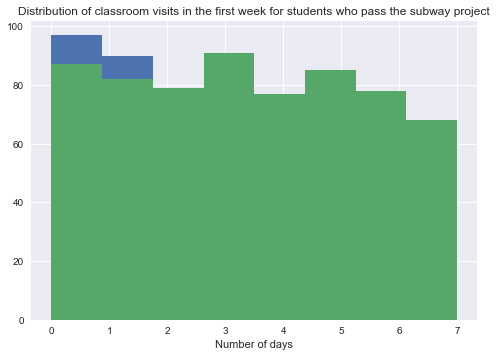

In [142]:
#improving plots

import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')